In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import cycxchg as cxc

# <ins>Primary Example: Twistane</ins>
Twistane ${\rm C_{10}H_{16}}$ is a small cage-like molecule with 5 relevant hexagonal cycles $C_0,...,C_4$ and two pinwheel-shaped (abstract) polyhedra $P_0,P_1$. These polyhedral structures have the same carbon skeleton as bicyclo[2.2.2]octane. These features shown below.

Text(0.5, 1.0, 'Polyhedra\n\n')

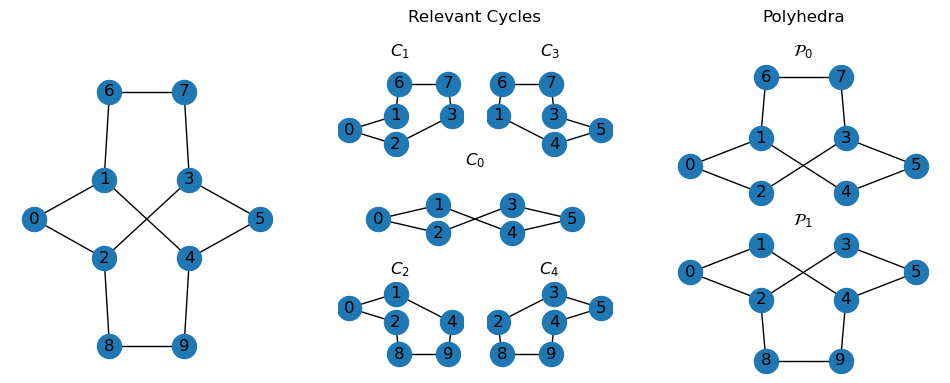

In [2]:
fig = plt.figure(figsize=(12,4))

######### build graph ##########
G = nx.Graph()
G.add_nodes_from(range(10))
G.add_edges_from([[0,1],[0,2],[1,4],[2,3],[3,5],[4,5],
                    [1,6],[6,7],[7,3],  [2,8],[8,9],[9,4]])

######### To visualize #########
gs = gridspec.GridSpec(1,3, figure=fig)
# draw main graph
pos = nx.spring_layout(G,pos={0:[-2,1.5],1:[-1,2],2:[-1,1],3:[1,2],4:[1,1],5:[2,1.5],6:[-1,3],7:[1,3],8:[-1,0],9:[1,0]})
ax = fig.add_subplot(gs[0])
nx.draw(G,with_labels=True,pos=pos,ax=ax)

# draw relevant cycles
gs1 = gridspec.GridSpecFromSubplotSpec(3, 2, subplot_spec=gs[1])
axs = [fig.add_subplot(gs1[1, :]), fig.add_subplot(gs1[0, 0]), fig.add_subplot(gs1[0, 1]), 
       fig.add_subplot(gs1[2, 0]), fig.add_subplot(gs1[2, 1])]
nx.draw(G.subgraph([0,1,2,3,4,5]),with_labels=True,pos=pos,ax=axs[0])
axs[0].set_title(r'$C_0$'), axs[0].set_ylim([-1,1]), axs[0].set_xlim([-1.1,1.1])
nx.draw(G.subgraph([0,1,2,3,6,7]),with_labels=True,pos=pos,ax=axs[1])
axs[1].set_title(r'$C_1$'), axs[1].set_ylim([-0.55,1.4])
nx.draw(G.subgraph([1,3,4,5,6,7]),with_labels=True,pos=pos,ax=axs[2])
axs[2].set_title(r'$C_3$'), axs[2].set_ylim([-0.55,1.4])
nx.draw(G.subgraph([0,1,2,4,8,9]),with_labels=True,pos=pos,ax=axs[3])
axs[3].set_title(r'$C_2$'), axs[3].set_ylim([-1.4,0.55])
nx.draw(G.subgraph([2,3,4,5,8,9]),with_labels=True,pos=pos,ax=axs[4])
axs[4].set_title(r'$C_4$'), axs[4].set_ylim([-1.4,0.55])
ax1 = fig.add_subplot(gs[1])
ax1.axis('off')
ax1.set_title('Relevant Cycles\n\n')

# draw polyhedra
gs2 = gridspec.GridSpecFromSubplotSpec(2, 1, subplot_spec=gs[2])
axs = [fig.add_subplot(gs2[0]), fig.add_subplot(gs2[1])]
nx.draw(G.subgraph([0,1,2,3,4,5,6,7]),with_labels=True,pos=pos,ax=axs[0])
axs[0].set_title(r'$\mathcal{P}_0$')
nx.draw(G.subgraph([0,1,2,3,4,5,8,9]),with_labels=True,pos=pos,ax=axs[1])
axs[1].set_title(r'$\mathcal{P}_1$')
ax2 = fig.add_subplot(gs[2])
ax2.axis('off')
ax2.set_title('Polyhedra\n\n')

## Random minimum cycle basis of twistane
Twistane has 8 minimum cycle bases: 
- $\mathcal{M}_1 = \{C_0,C_1,C_2\}$
- $\mathcal{M}_2 = \{C_0,C_1,C_4\}$
- $\mathcal{M}_3 = \{C_0,C_2,C_3\}$
- $\mathcal{M}_4 = \{C_0,C_3,C_4\}$
- $\mathcal{M}_5 = \{C_1,C_2,C_3\}$
- $\mathcal{M}_6 = \{C_1,C_3,C_4\}$
- $\mathcal{M}_7 = \{C_1,C_2,C_4\}$
- $\mathcal{M}_8 = \{C_2,C_3,C_4\}$

Here we randomize the minimum cycle basis using a Markov chain Monte Carlo (MCMC) approach. For a given minimum cycle basis $\mathcal{M}$
1. Choose a cycle $C'$ not in $\mathcal{M}$.
2. Build a polyhedron $\mathcal{P}$ using $C'$ and its expansion in $\mathcal{M}$. Note, $\mathcal{P}_2 = \mathcal{P}_0\triangle \mathcal{P}_1 = \{C_1,C_2,C_3,C_4\}$ is also a polyhedron.
3. choose a random cycle $C\in\mathcal{P}$ and replace $C$ with $C'$ to update the minimum cycle basis $\mathcal{M}'=\mathcal{M}\setminus\{C\}\cup\{C'\}$. If $C=C'$ then we add and remove $C'$, i.e., there is no change and $\mathcal{M}'=\mathcal{M}$.

We iterate this procedure using the R-matrix for the expansion of the relevant cycles

MCB cycles:
[[0, 2, 3, 5, 4, 1], [0, 2, 3, 7, 6, 1], [0, 2, 8, 9, 4, 1]]

R Matrix:


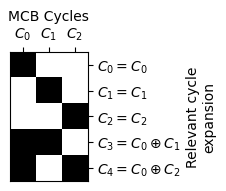

In [3]:
# show the R matrix

cyc_dec = cxc.cycle_decomposition(G)

fig,ax = plt.subplots(figsize = (1,2))

cyc_dec.R_Mat.plot(ax=ax)
ax.set_xlabel('MCB Cycles')
ax.xaxis.set_label_position('top')
ax.set_xticks([0,1,2],[r'$C_0$',r'$C_1$',r'$C_2$'])
ax.set_ylabel('Relevant cycle\nexpansion')
ax.yaxis.set_label_position('right')
ax.set_yticks([0,1,2,3,4],[r'$C_0=C_0$',r'$C_1=C_1$',r'$C_2=C_2$',r'$C_3=C_0\oplus C_1$',r'$C_4=C_0\oplus C_2$']);
ax.tick_params(labelright=True,labelleft=False,right=True,left=False, bottom=False)

print('MCB cycles:')
print(cyc_dec.get_MCB(rep='nodes'))

print('\nR Matrix:')

#### MCMC Approach
Next we show 5 iterations of the Markov chain used to obtain a random minimum cycle basis. This can also be done using the cycle decomposition object, `cyc_dec`.

In [4]:
Cyc_idxs = np.arange(5)
RT = cyc_dec.R_Mat.copy().T

for i in range(5):
    print(f'MCB at start of iter. {i}: C{Cyc_idxs[0]}, C{Cyc_idxs[1]}, C{Cyc_idxs[2]}')

    C_new = np.random.randint(3,5)
    print(f"Cycle to introduce: C{Cyc_idxs[C_new]}")

    P = RT[C_new].nonzero + [C_new]    # nonzero values in row Cnew in R_Mat
    print(f"Polyhedron: P = [" + ''.join(['C'+str(Cyc_idxs[C])+', ' for C in P])[:-2] + "]")

    C_old = np.random.choice(P)

    # update
    if C_old != C_new:
        print(f'Cycle to replace: C{Cyc_idxs[C_old]}\n')
        # swap cycle indexes
        aux = Cyc_idxs[C_old]
        Cyc_idxs[C_old] = Cyc_idxs[C_new]
        Cyc_idxs[C_new] = aux
    
        # update expansion vectors, rep. of MCB does not change, nor does Cnew
        # only one cycle can change
        idx = 7-C_new # swap numbers 3 and 4
        if RT[C_old,idx]: # C_old in expansion of this cycle, so it must be updated
            aux_row = RT[C_new]
            aux_row[C_old] = 0
            RT[idx] += aux_row
    else:
        print(f'Cycle to replace: C{Cyc_idxs[C_old]} (reject)\n')
    
print(f'final MCB: C{Cyc_idxs[0]}, C{Cyc_idxs[1]}, C{Cyc_idxs[2]}')

MCB at start of iter. 0: C0, C1, C2
Cycle to introduce: C3
Polyhedron: P = [C0, C1, C3]
Cycle to replace: C3 (reject)

MCB at start of iter. 1: C0, C1, C2
Cycle to introduce: C4
Polyhedron: P = [C0, C2, C4]
Cycle to replace: C0

MCB at start of iter. 2: C4, C1, C2
Cycle to introduce: C0
Polyhedron: P = [C4, C2, C0]
Cycle to replace: C4

MCB at start of iter. 3: C0, C1, C2
Cycle to introduce: C3
Polyhedron: P = [C0, C1, C3]
Cycle to replace: C0

MCB at start of iter. 4: C3, C1, C2
Cycle to introduce: C4
Polyhedron: P = [C3, C1, C2, C4]
Cycle to replace: C2

final MCB: C3, C1, C4


#### With the cycle decomposition class
We can also obtain a random basis using the interchangeable cycles class using the `cyc_dec.random_MCB()` method. By default, the number of iterations this method uses is
$$N_{\rm steps} = 2\ {\rm nullity}(R)^2 \frac{|\mathcal{S}_{\max}|}{|\mathcal{S}_{\min}|}$$
where the nullity or rank of the null space of $R$ is equal to the dimension of the polyhedron space and $|\mathcal{S}_{\max}|$ ($|\mathcal{S}_{\min}|$) is the number of cycles in the largest (smallest) sli class. For twistane, $N_{\rm steps} = 2 * 2^2 * 1 = 8$, for which we show the uniformity of MCB samples below.

In [5]:
Trials = 100_000

# repeatedly sample minimum cycle bases
sample_dict = {}
for i in range(Trials):
    if i%1000 == 0:
        print(f'{i/Trials*100:3.0f}%\r',end='')
    cycles = cxc.cycle_decomposition(G).random_MCB()
    idx = tuple(sorted([tuple(C) for C in cycles]))
    if idx in sample_dict: sample_dict[idx]+=1
    else:                  sample_dict[idx] =1

# output results
print('Sample distribution of minimum cycle bases (desired is uniform = 0.125)')
for MCB,frac in sample_dict.items():
    print(f'MCB: {MCB}; fraction of samples: {frac/Trials}')

Sample distribution of minimum cycle bases (desired is uniform = 0.125)
MCB: ((0, 2, 3, 7, 6, 1), (0, 2, 8, 9, 4, 1), (4, 5, 3, 7, 6, 1)); fraction of samples: 0.1252
MCB: ((0, 2, 3, 5, 4, 1), (0, 2, 3, 7, 6, 1), (0, 2, 8, 9, 4, 1)); fraction of samples: 0.12648
MCB: ((0, 2, 8, 9, 4, 1), (3, 2, 8, 9, 4, 5), (4, 5, 3, 7, 6, 1)); fraction of samples: 0.12403
MCB: ((0, 2, 3, 7, 6, 1), (0, 2, 8, 9, 4, 1), (3, 2, 8, 9, 4, 5)); fraction of samples: 0.12592
MCB: ((0, 2, 3, 5, 4, 1), (3, 2, 8, 9, 4, 5), (4, 5, 3, 7, 6, 1)); fraction of samples: 0.12358
MCB: ((0, 2, 3, 5, 4, 1), (0, 2, 3, 7, 6, 1), (3, 2, 8, 9, 4, 5)); fraction of samples: 0.1242
MCB: ((0, 2, 3, 5, 4, 1), (0, 2, 8, 9, 4, 1), (4, 5, 3, 7, 6, 1)); fraction of samples: 0.12693
MCB: ((0, 2, 3, 7, 6, 1), (3, 2, 8, 9, 4, 5), (4, 5, 3, 7, 6, 1)); fraction of samples: 0.12366


#### Equilibriation
The number of Markov chain steps can also be supplied as a function of a `pi` class (the randomization approach is performed separately on each `pi` class). Below is an example that is less equilibriated.

In [6]:
Trials = 100_000

# repeatedly sample minimum cycle bases
sample_dict = {}
for i in range(Trials):
    if i%1000 == 0:
        print(f'{i/Trials*100:3.0f}%\r',end='')
    cycles = cxc.cycle_decomposition(G).random_MCB(lambda pc: 4) # 4 iterations instead of 8
    # can also access, e.g., number of polyhedra = pc.dim_polyhedra and included sli classes=pc.sli_classes
    idx = tuple(sorted([tuple(C) for C in cycles]))
    if idx in sample_dict: sample_dict[idx]+=1
    else:                  sample_dict[idx] =1

# output results
print('Sample distribution of minimum cycle bases (desired is uniform = 0.125)')
for MCB,frac in sample_dict.items():
    print(f'MCB: {MCB}; fraction of samples: {frac/Trials}')

Sample distribution of minimum cycle bases (desired is uniform = 0.125)
MCB: ((0, 2, 3, 7, 6, 1), (0, 2, 8, 9, 4, 1), (3, 2, 8, 9, 4, 5)); fraction of samples: 0.13289
MCB: ((0, 2, 8, 9, 4, 1), (3, 2, 8, 9, 4, 5), (4, 5, 3, 7, 6, 1)); fraction of samples: 0.11414
MCB: ((0, 2, 3, 7, 6, 1), (0, 2, 8, 9, 4, 1), (4, 5, 3, 7, 6, 1)); fraction of samples: 0.13418
MCB: ((0, 2, 3, 5, 4, 1), (0, 2, 3, 7, 6, 1), (0, 2, 8, 9, 4, 1)); fraction of samples: 0.14807
MCB: ((0, 2, 3, 5, 4, 1), (3, 2, 8, 9, 4, 5), (4, 5, 3, 7, 6, 1)); fraction of samples: 0.10631
MCB: ((0, 2, 3, 5, 4, 1), (0, 2, 3, 7, 6, 1), (3, 2, 8, 9, 4, 5)); fraction of samples: 0.1264
MCB: ((0, 2, 3, 7, 6, 1), (3, 2, 8, 9, 4, 5), (4, 5, 3, 7, 6, 1)); fraction of samples: 0.11138
MCB: ((0, 2, 3, 5, 4, 1), (0, 2, 8, 9, 4, 1), (4, 5, 3, 7, 6, 1)); fraction of samples: 0.12663


# <ins> Modified twistane</ins>
By doubling up the right path (3, 5, 4) we introduce trivial-interchangeability classes with more than one cycle. This hypothetical structure has chemical formula $\rm C_{11}H_{16}$. This structure is not necessarily physical, but it is a useful example for illustrating how to extend the above procedure to general graphs. 

This graph has 8 relevant cycles of length 6 $C_0,C_0',C_1,C_2,C_3,C_3',C_4,C_4'$ and 1 relevant cycle of length 4 $C_5$. The relevant cycles are split into 6 sli classes $\mathcal{S}_0, ...,\mathcal{S}_5$. There exist two modified polyhedra of this systems, i.e., minimal collections of sli classes that sum to smaller cycles. These are shown below.

Text(0.5, 1.0, 'Modified Polyhedra\n\n')

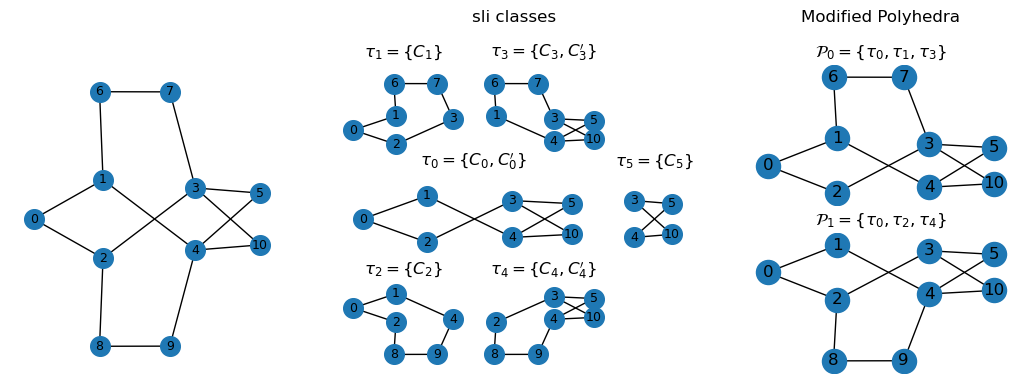

In [7]:
fig = plt.figure(figsize=(13,4))

######### build graph ##########
G = nx.Graph()
G.add_nodes_from(range(10))
G.add_edges_from([[0,1],[0,2],[1,4],[2,3],[3,5],[4,5],
                  [1,6],[6,7],[7,3], [2,8],[8,9],[9,4],
                  [3,10],[10,4]])

######### To visualize #########
gs = gridspec.GridSpec(1,3, figure=fig,width_ratios= [4,5,4])
# draw main graph
pos = nx.spring_layout(G,pos={0:[-2,1.5],1:[-1,2],2:[-1,1],3:[1,2],4:[1,1],5:[2,1.51],6:[-1,3],7:[1,3],8:[-1,0],9:[1,0],10:[2,1.49]})
ax = fig.add_subplot(gs[0])
nx.draw(G,with_labels=True,pos=pos,ax=ax,node_size=200,font_size=9)

# draw trivial-interchangeability classes
gs1 = gridspec.GridSpecFromSubplotSpec(3, 3, subplot_spec=gs[1],width_ratios=[2,2,1])
axs = [fig.add_subplot(gs1[1, :2]), fig.add_subplot(gs1[0, 0]), fig.add_subplot(gs1[0, 1]), 
       fig.add_subplot(gs1[2, 0]), fig.add_subplot(gs1[2, 1]), fig.add_subplot(gs1[1, 2])]
nx.draw(G.subgraph([0,1,2,3,4,5,10]),with_labels=True,pos=pos,ax=axs[0],node_size=200,font_size=9)
axs[0].set_title(r"$\tau_0 = \{C_0,C_0'\}$"), axs[0].set_ylim([-.6,.6]), axs[0].set_xlim([-1.1,1.1])
nx.draw(G.subgraph([0,1,2,3,6,7]),with_labels=True,pos=pos,ax=axs[1],node_size=200,font_size=9)
axs[1].set_title(r'$\tau_1 = \{C_1\}$'), axs[1].set_ylim([-0.55,1.4])
nx.draw(G.subgraph([1,3,4,5,6,7,10]),with_labels=True,pos=pos,ax=axs[2],node_size=200,font_size=9)
axs[2].set_title(r"$\tau_3 = \{C_3,C_3'\}$"), axs[2].set_ylim([-0.55,1.4])
nx.draw(G.subgraph([0,1,2,4,8,9]),with_labels=True,pos=pos,ax=axs[3],node_size=200,font_size=9)
axs[3].set_title(r'$\tau_2=\{C_2\}$'), axs[3].set_ylim([-1.4,0.55])
nx.draw(G.subgraph([2,3,4,5,8,9,10]),with_labels=True,pos=pos,ax=axs[4],node_size=200,font_size=9)
axs[4].set_title(r"$\tau_4=\{C_{4},C_{4}'\}$"), axs[4].set_ylim([-1.4,0.55])
nx.draw(G.subgraph([3,5,4,10]),with_labels=True,pos=pos,ax=axs[5],node_size=200,font_size=9)
axs[5].set_title(r"$\tau_5 = \{C_5\}$"), axs[5].set_ylim([-.6,.6]), axs[5].set_xlim([0.2,1])
ax1 = fig.add_subplot(gs[1])
ax1.axis('off')
ax1.set_title('sli classes\n\n')

# draw polyhedra
gs2 = gridspec.GridSpecFromSubplotSpec(2, 1, subplot_spec=gs[2])
axs = [fig.add_subplot(gs2[0]), fig.add_subplot(gs2[1])]
nx.draw(G.subgraph([0,1,2,3,4,5,6,7,10]),with_labels=True,pos=pos,ax=axs[0])
axs[0].set_title(r'$\mathcal{P}_0=\{\tau_0,\tau_1,\tau_3\}$')
nx.draw(G.subgraph([0,1,2,3,4,5,8,9,10]),with_labels=True,pos=pos,ax=axs[1])
axs[1].set_title(r'$\mathcal{P}_1=\{\tau_0,\tau_2,\tau_4\}$')
ax2 = fig.add_subplot(gs[2])
ax2.axis('off')
ax2.set_title('Modified Polyhedra\n\n')

## Random sampling of modified twistane
The above graph has 30 minimum cycle bases. Below these MCBs are listed and split by the sli classes the cycles belong to:
- $\mathcal{M}_{1\color{white}1} = \{C_0,C_1,C_2,C_5\}$, $\mathcal{M}_{2\color{white}1}=\{C_0',C_1,C_2,C_5\}$,
- $\mathcal{M}_{3\color{white}1} = \{C_0,C_2,C_3,C_5\}$, $\mathcal{M}_{4\color{white}1}=\{C_0',C_2,C_3,C_5\}$, $\mathcal{M}_{5\color{white}1} = \{C_0,C_2,C_3',C_5\}$, $\mathcal{M}_{6\color{white}1}=\{C_0',C_2,C_3',C_5\}$,
- $\mathcal{M}_{7\color{white}1} = \{C_0,C_1,C_4,C_5\}$, $\mathcal{M}_{8\color{white}1}=\{C_0',C_1,C_4,C_5\}$, $\mathcal{M}_{9\color{white}1} = \{C_0,C_1,C_4',C_5\}$, $\mathcal{M}_{10}=\{C_0',C_1,C_4',C_5\}$,
- $\mathcal{M}_{11} = \{C_0,C_3,C_4,C_5\}$, $\mathcal{M}_{12}=\{C_0',C_3,C_4,C_5\}$, $\mathcal{M}_{13} = \{C_0,C_3',C_4,C_5\}$, $\mathcal{M}_{14}=\{C_0',C_3',C_4,C_5\}$,<br>
  $\mathcal{M}_{15} = \{C_0,C_3,C_4',C_5\}$, $\mathcal{M}_{16}=\{C_0',C_3,C_4',C_5\}$, $\mathcal{M}_{17} = \{C_0,C_3',C_4',C_5\}$, $\mathcal{M}_{18}=\{C_0',C_3',C_4',C_5\}$,
- $\mathcal{M}_{19} = \{C_1,C_2,C_3,C_5\}$, $\mathcal{M}_{20} = \{C_1,C_2,C_3',C_5\}$,
- $\mathcal{M}_{21} = \{C_1,C_2,C_4,C_5\}$, $\mathcal{M}_{22} = \{C_1,C_2,C_4',C_5\}$,
- $\mathcal{M}_{23} = \{C_1,C_3,C_4,C_5\}$, $\mathcal{M}_{24} = \{C_1,C_3',C_4,C_5\}$, $\mathcal{M}_{25} = \{C_1,C_3,C_4',C_5\}$, $\mathcal{M}_{26} = \{C_1,C_3',C_4',C_5\}$,
- $\mathcal{M}_{27} = \{C_2,C_3,C_4,C_5\}$, $\mathcal{M}_{28} = \{C_2,C_3',C_4,C_5\}$, $\mathcal{M}_{29} = \{C_2,C_3,C_4',C_5\}$, $\mathcal{M}_{30} = \{C_2,C_3',C_4',C_5\}$.

To randomize these minimum cycle bases we still use MCMC methods, but now they are applied sli classes. For instance, let us initialize our sli classes to $\{\mathcal{S}_0,\mathcal{S}_2,\mathcal{S}_3,\mathcal{S}_5\}$, which corresponds to 4 minimum cycle bases $\mathcal{M}_3,\mathcal{M}_4,\mathcal{M}_5,\mathcal{M}_6$. We randomize these sli classes as follows
1. Draw a sli class not belonging to our current set, say $\tau_1$.
2. Build a modified polyhedron $\mathcal{P}$ using this new class and the sli classes in our working set. Here $\mathcal{P}=\mathcal{P}_0=\{\mathcal{S}_0,\mathcal{S}_1,\mathcal{S}_3\}$.
3. Draw a sli class from $\mathcal{P}$ to replace with probability proportional to its inverse size. For instance, we could draw $\mathcal{S}_3$ with probability proportional to $1/|\mathcal{S}_3| = 1/2$ resulting in the new collection of trivial-interchangeability classes $\{\mathcal{S}_0,\mathcal{S}_1,\mathcal{S}_2,\mathcal{S}_5\}$.

We repeat this procedure towards equilibrium, then sample from the resulting trivial-interchangeability classes at random. These steps are handled by the `cyc_dec.random_MCB()` method. Here we show the distribution of minimum cycle bases to verify that it is sufficiently uniform.

In [8]:
Trials = 100_000

# repeatedly sample minimum cycle bases
sample_dict = {}
for i in range(Trials):
    if i%1000 == 0:
        print(f'{i/Trials*100:3.0f}%\r',end='')
    cycles = cxc.cycle_decomposition(G).random_MCB()
    idx = tuple(sorted([tuple(C) for C in cycles]))
    if idx in sample_dict: sample_dict[idx]+=1
    else:                  sample_dict[idx] =1

# output results
print('Sample distribution of minimum cycle bases (desired is uniform = 0.033...)')
for MCB,frac in sample_dict.items():
    print(f'MCB: {MCB}; fraction of samples: {frac/Trials}')

Sample distribution of minimum cycle bases (desired is uniform = 0.033...)
MCB: ((0, 2, 3, 7, 6, 1), (0, 2, 3, 10, 4, 1), (3, 2, 8, 9, 4, 10), (5, 3, 10, 4)); fraction of samples: 0.03413
MCB: ((0, 2, 3, 5, 4, 1), (3, 2, 8, 9, 4, 10), (5, 3, 10, 4), (6, 7, 3, 10, 4, 1)); fraction of samples: 0.03363
MCB: ((0, 2, 3, 5, 4, 1), (0, 2, 8, 9, 4, 1), (5, 3, 10, 4), (6, 7, 3, 10, 4, 1)); fraction of samples: 0.03345
MCB: ((0, 2, 3, 5, 4, 1), (0, 2, 3, 7, 6, 1), (3, 2, 8, 9, 4, 5), (5, 3, 10, 4)); fraction of samples: 0.03341
MCB: ((0, 2, 3, 7, 6, 1), (0, 2, 8, 9, 4, 1), (3, 2, 8, 9, 4, 5), (5, 3, 10, 4)); fraction of samples: 0.03388
MCB: ((0, 2, 8, 9, 4, 1), (3, 2, 8, 9, 4, 5), (5, 3, 10, 4), (6, 7, 3, 10, 4, 1)); fraction of samples: 0.03306
MCB: ((0, 2, 8, 9, 4, 1), (3, 2, 8, 9, 4, 5), (4, 5, 3, 7, 6, 1), (5, 3, 10, 4)); fraction of samples: 0.0331
MCB: ((0, 2, 3, 7, 6, 1), (0, 2, 8, 9, 4, 1), (4, 5, 3, 7, 6, 1), (5, 3, 10, 4)); fraction of samples: 0.03404
MCB: ((0, 2, 3, 5, 4, 1), (0, 2,

# <ins> Dual Graph</ins>
When `Nmerge` is set to `True` the connection paths between MCB cycles are also output. These are given by two matrices 
- `Indices[i,j]`: The starting point in cycle i (as an index) for the path $P_{i,j}$ joining cycles i and j
- `Weights[i,j]`: A signed integer whose magnitude gives the number of nodes in $P_{i,j}$ and sign gives the direction $P_{i,j}$ takes through $C_i$ starting from `Indices[i,j]`

This format is lossless, and an intersection path between $C_i$ and $C_j$ can be computed using $C_i$ and these values. If only the path lengths are desired then the absolute value of `Weights` is sufficient.

cycle 0 and cycle 1 intersect over path P(0,1) = [3, 2, 1, 0]
cycle 0 and cycle 2 intersect over path P(0,2) = [3, 2, 1, 0]
cycle 1 and cycle 2 intersect over path P(1,2) = [0, 1, 2, 3]


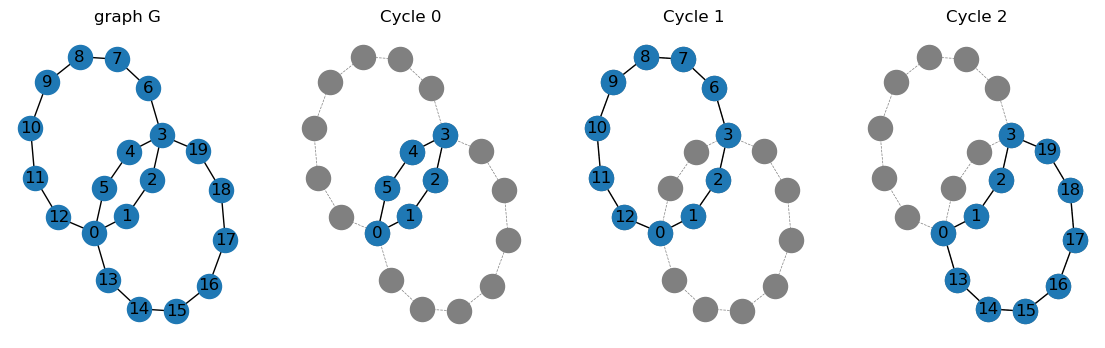

In [10]:
# build graph
G = nx.Graph()
nx.add_cycle(G,range(6))
nx.add_cycle(G,[0,1,2,3,6,7,8,9,10,11,12])
nx.add_cycle(G,[3,4,5,0,13,14,15,16,17,18,19])

# draw graph
fig,ax = plt.subplots(1,4,figsize=(14,4))
pos = nx.kamada_kawai_layout(G)
nx.draw(G,pos,with_labels=True,ax=ax[0])
ax[0].set_title('graph G')

# compute MCB
MCB,Weights,Indices = cxc.cycle_decomposition(G).random_MCB(merge_MCB=True)

# show MCB cycles
for j in range(3):
    nx.draw(G,pos,node_color='gray',edge_color='gray',style='dashed',width=.5,ax=ax[j+1])
    Gcyc = nx.Graph()
    nx.add_cycle(Gcyc,MCB[j])
    nx.draw(Gcyc,pos,with_labels=True,ax=ax[j+1])
    ax[j+1].set_title(f'Cycle {j}')

# recompute intersection paths
for i in range(3):
    for j in range(i,3):
        if Weights[i,j]!=0:
            C1 = MCB[i]
            L1 = len(MCB[i])
            idx,w = int(Indices[i,j]),int(Weights[i,j])
            print(f'cycle {i} and cycle {j} intersect over path P({i},{j}) =',[C1[idx2%L1] for idx2 in range(idx,idx+w,np.sign(w))])
            C2 = MCB[j]
            idx2 = int(Indices[j,i])
            assert C1[idx] == C2[idx2] # node at index is the same for both cycles